# Introduction to Thompson Sampling

## Implementation

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

In [73]:
no_of_trials = 3000
bandits_true_prob = [0.1, 0.45, 0.85] # We usually do not know this value. For experimental purposes, we define the 3 bandits to have these true probabilities (win rate).

In [67]:
class Bandit():
    def __init__(self, p):
        self.p = p
        self.a = 1 #initial value
        self.b = 1 #initial value
        self.N = 0
    
    def pull(self):
        return np.random.random() < self.p # returns 0 or 1
    
    def sample(self):
        return np.random.beta(self.a,self.b) # returns a value within the confidence interval
    
    def update(self, x):
        self.a += x
        self.b += 1-x
        self.N += 1

In [120]:
def plots(bandits, trials):
        plt.figure(figsize=(16,9))
        x = np.linspace(0,1,200)
        for b in bandits:
            y = beta.pdf(x, b.a, b.b) # creates a beta distribution within 0 to 1
            plt.plot(x,y, label=f'True probability:{b.p}, Win rate = {b.a-1}/{b.N}')
        plt.title(f'Distribution for each bandit after {trials} trials')
        plt.legend()
        plt.show()    

In [134]:
def experiment():
    np.random.seed(2)
    bandits = [Bandit(p) for p in bandits_true_prob]
    n_trials = [0,5,10,20,50,100,200,500,1000,2000,3000]
    rewards = np.zeros(no_of_trials)
    for i in np.arange(0,no_of_trials):
        j = np.argmax([b.sample() for b in bandits])
        if i in n_trials:
            plots(bandits,i)
        x = bandits[j].pull() #x is 0 or 1 here
        
        # Get feedback after bandit is triggered (pulled)
        bandits[j].update(x)
        rewards[i] = x 
    return rewards


## Results

rewards = experiment()

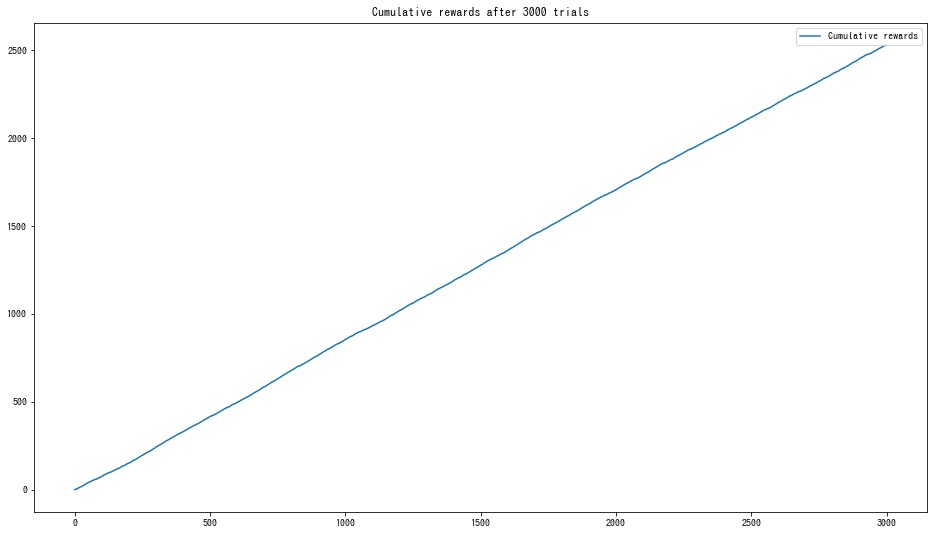

In [136]:
plt.figure(figsize=(16,9))
plt.plot(np.cumsum(rewards),label=f'Cumulative rewards')
plt.title(f'Cumulative rewards after 3000 trials')
plt.legend()
plt.show()